In [104]:
from cmath import exp
import numpy as np
from math import log, e
import math
import scipy.stats as stat2
from random import random
import matplotlib.pyplot as plt


def logisticPDF(parameters, bins):
    """
    It takes in two parameters, the first of which is the location of the peak of the logistic function,
    and the second of which is the width of the logistic function. It then returns the logistic function
    evaluated at the bins

    :param parameters: [mu, sigma]
    :param bins: the x-axis of the histogram
    :return: The logistic function.
    """

    num = np.exp(-(bins-parameters[0])/parameters[1])
    den = parameters[1]*(1 + num)**2

    return num/den

def logisticCDF(parameters, bins):
    """
    The logistic CDF is the cumulative distribution function of the logistic distribution

    :param parameters: [mu, sigma]
    :param bins: the x-axis of the histogram
    :return: The logistic CDF is being returned.
    """

    num = np.exp(-(bins-parameters[0])/parameters[1])
    cdf = 1/(1 + num)

    return cdf

    
def generateObservedExpectedValues(generatedValues, functionName, functionParameters=[]):

    """
    It takes a list of generated values, a function name, and a list of parameters for that function,
    and returns the observed values, expected values, and number of groups
    
    :param generatedValues: the values generated by the random number generator
    :param functionName: the name of the function that generates the random numbers
    :param functionParameters: the parameters of the distribution function
    :return: The observed values, expected values, and the number of groups.
    """

    numGroups = round(1 + log(len(generatedValues))/log(2))
    maxValue = max(generatedValues)

    observedValues, bins = np.histogram(generatedValues, bins=numGroups)
    # print(numGroups, observedValues, bins)

    probs = functionName(functionParameters, bins)
    # print(probs)
    probsExp = []

    for i in range(1, numGroups+1):
        probsExp.append(probs[i] - probs[i-1])
    # print(probsExp)
    expectedValues = np.array(probsExp)*len(generatedValues)

    return observedValues, expectedValues, numGroups


def pearsonTest(observedValues, expectedValues, numGroups, numParameters):
    est_chi = 0

    for k in range(numGroups):
        est_chi = est_chi + ((observedValues[k] - expectedValues[k])**2)/expectedValues[k]

    
    result = stat2.chisquare(observedValues, expectedValues, numGroups - numParameters, axis=None)
    print("result: ", result.statistic)
    print("est_chi", est_chi)
    print("chi2cdf: ", stat2.chi2.cdf(est_chi, numGroups - numParameters))
    print("chi2cdf.result: ", stat2.chi2.cdf(result.statistic, numGroups - numParameters))


    return stat2.chi2.cdf(result.statistic, numGroups - numParameters)
    

result:  2.6631340415512743
est_chi 2.663134041551274
chi2cdf:  0.08567957885881088
chi2cdf.result:  0.08567957885881093



El conjunto sigue una distribucion Logistica


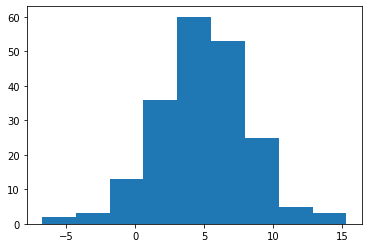

In [105]:
def inverseLogistic(mu, s, U):
    """
    It generates a random number from a logistic distribution.

    :param mu: the mean of the distribution
    :param s: the standard deviation of the distribution
    """

    x = 2*s*np.arctanh(2*U - 1) + mu
    return x

def logisticInverse(mu, sigma, p):
    """
    It generates a random number from a logistic distribution.

    :param mu: the mean of the distribution
    :param s: the standard deviation of the distribution
    :param p: uniform random
    """

    Q = mu + sigma*log(p/(1-p))
    return Q


logs = []
logs2 = []
mu = 5
sigma = 2

for i in range(200):
  U = random()
  logt = logisticInverse(mu,sigma,U)
  # logt2 = inverseLogistic(mu,sigma,U)
  logs.append(logt)
  # logs2.append(logt2)

# print(logs)

observedValues, expectedValues, numGroups = generateObservedExpectedValues(logs, logisticCDF, functionParameters=[mu,sigma])

pearson = pearsonTest(observedValues, expectedValues, numGroups, 2)

plt.hist(logs, bins=numGroups)



if pearson <= 0.95:
  print("\n\n\nEl conjunto sigue una distribucion Logistica")